# Plotting radial wave function for quark model

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import scipy as sp
from scipy import special, integrate
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [16]:
def plot(ax, name, cutoff=[-sp.inf, sp.inf]):
    data = pd.read_csv(name, delimiter="|", index_col=0)
    data = data.loc[(data.index > cutoff[0]) & (data.index < cutoff[1])]
    ax.plot(data.index, data['u']**2, linestyle="", marker=".")
    return ax

# $\Upsilon(3S)$

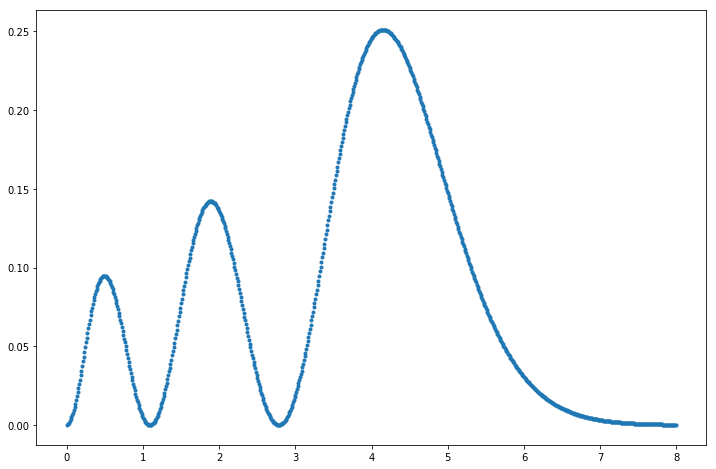

In [22]:
plot(plt.gca(), "points.dat", cutoff=[-sp.inf, 8])